In [45]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

# Geometric Transformations

Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.



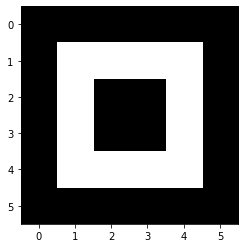

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [3]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

We can rescale along a specific axis:

fx: scale factor along the horizontal axis
fy: scale factor along the vertical axis

The parameter interpolation estimates pixel values based on neighboring pixels. INTER_NEAREST uses the nearest pixel and INTER_CUBIC uses several pixels near the pixel value we would like to estimate.

In [4]:
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST )

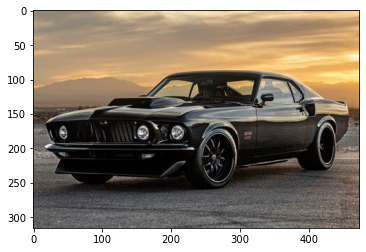

In [5]:
image  = cv2.imread("429.jpeg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

We can scale the horizontal axis by two and leave the vertical axis as is:

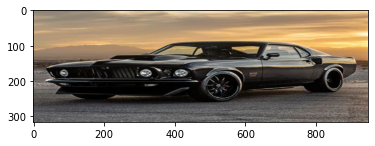

OLd image shape: (316, 474, 3) new_image_shape (316, 948, 3)


In [6]:
new_image = cv2.resize(image, None,fx=2,fy=1,interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("OLd image shape:",image.shape,"new_image_shape",new_image.shape)

In the same manner, we can scale the vertical axis by two:

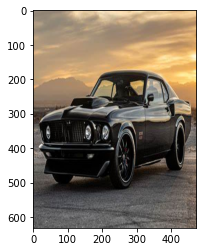

Old image shape (316, 474, 3) new_image_shape (632, 474, 3)


In [7]:
new_image = cv2.resize(image, None,fx=1,fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()
print("Old image shape",image.shape,"new_image_shape",new_image.shape)

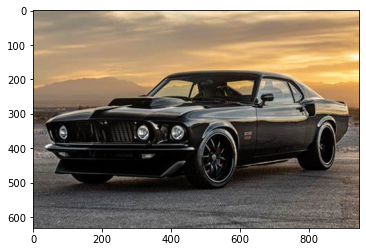

Old image shape (316, 474, 3) new_image_shape (632, 948, 3)


In [8]:
new_image = cv2.resize(image, None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()
print("Old image shape",image.shape,"new_image_shape",new_image.shape)

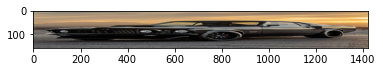

Old image shape (316, 474, 3) new_image_shape (158, 1422, 3)


In [9]:
new_image = cv2.resize(image, None,fx=3,fy=0.5,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()
print("Old image shape",image.shape,"new_image_shape",new_image.shape)

We can also specify the number of rows and columns:

In [10]:
rows = 100
cols = 200

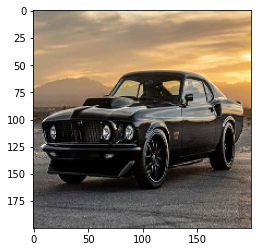

Old image shape (316, 474, 3) New image shape (200, 200, 3)


In [11]:
new_image = cv2.resize(image,(200,200),interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()
print("Old image shape",image.shape,"New image shape",new_image.shape)

# Translation

Translation is when you shift the location of the image. tx is the number of pixels you shift the location in the horizontal direction and ty is the number of pixels you shift in the vertical direction. You can create the transformation matrix  𝑀  to shift the image.

In [14]:
tx = 100
ty = 0
M = np.float32([[1,0,tx],[0,1,ty]])

In [15]:
rows,cols, _ = image.shape

We use the function warpAffine from the cv2 module. The first input parater is an image array, the second input parameter is the transformation matrix M, and the final input paramter is the length and width of the output image  (𝑐𝑜𝑙𝑠,𝑟𝑜𝑤𝑠) :

In [16]:
new_image = cv2.warpAffine(image,M,(cols,rows))
#new_image = cv2.warpAffine(image, M, (cols, rows))

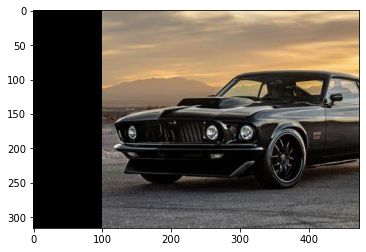

In [17]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

We can see some of the original image has been cut off. We can fix this by changing the output image size: (cols + tx,rows + ty):

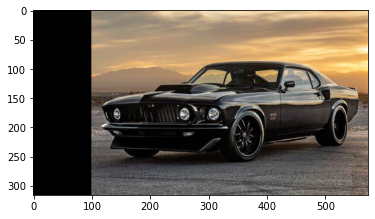

In [18]:
new_image = cv2.warpAffine(image,M,(cols+tx,rows+ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can shift the image horizontally:

# Rotation


We can rotate an image by angle θ which is achieved by the Rotation Matrix getRotationMatrix2D.

center: Center of the rotation in the source image. We will only use the center of the image.

angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).

scale: Isotropic scale factor, in this course the value will be one.

We can rotate our toy image by 45 degrees:

In [19]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3,3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image,M,(6,6))

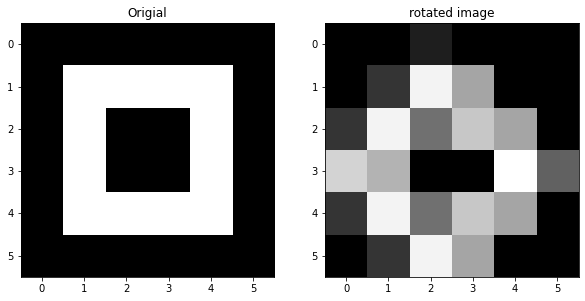

In [20]:
plot_image(toy_image, new_toy_image,title_1="Origial",title_2="rotated image")

In [21]:
new_toy_image

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

In [22]:
cols, rows, _=image.shape

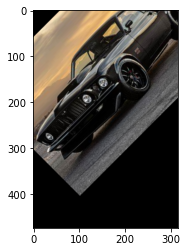

In [23]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1,rows // 2-1), angle=theta,scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

# Mathematical Operations

## Array Operations

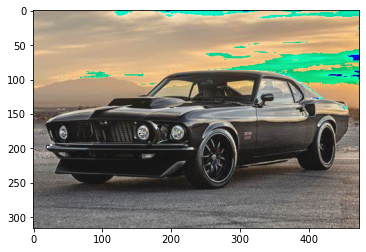

In [27]:
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

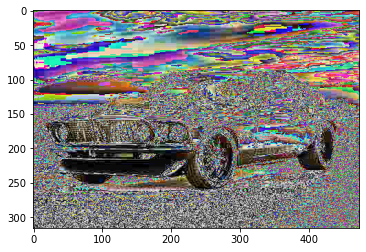

In [28]:
new_image = image * 10
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.

In [41]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
Noise.shape


(474, 316, 3)

In [47]:
new_image = image +Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: operands could not be broadcast together with shapes (316,474,3) (474,316,3) 

# Matrix Operations

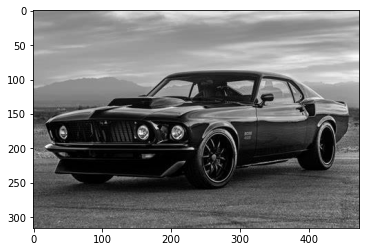

In [49]:
im_gray= cv2.imread('429.jpeg',cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

In [50]:
U, s,V = np.linalg.svd(im_gray, full_matrices=True)

In [51]:
s.shape

(316,)

In [52]:
U.shape

(316, 316)

In [53]:
S = np.zeros((im_gray.shape[0],im_gray.shape[1]))
S[:image.shape[0],:image.shape[0]]=np.diag(s)

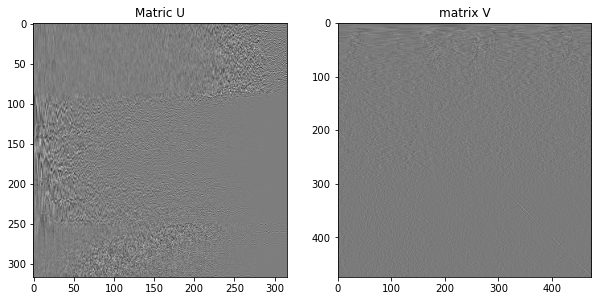

In [54]:
plot_image(U,V,title_1="Matric U",title_2="matrix V")

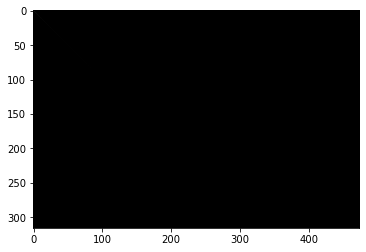

In [56]:
plt.imshow(S,cmap='gray')
plt.show()

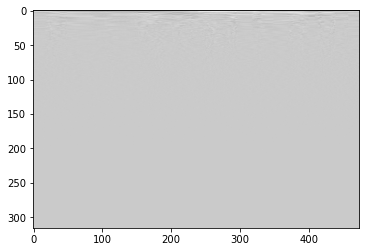

In [57]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

In [58]:
A = U.dot(B)


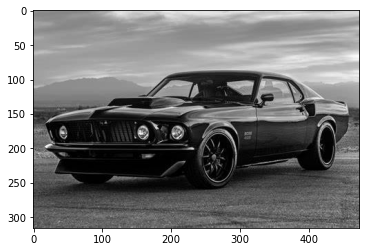

In [59]:
plt.imshow(A,cmap='gray')
plt.show()

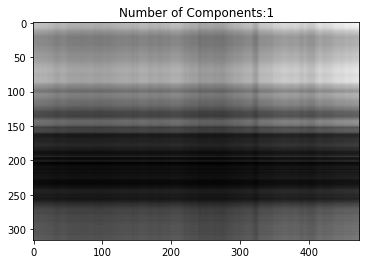

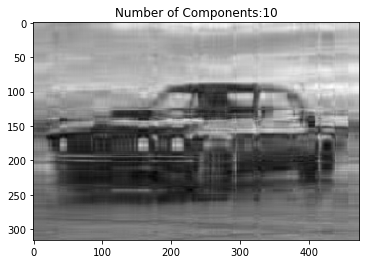

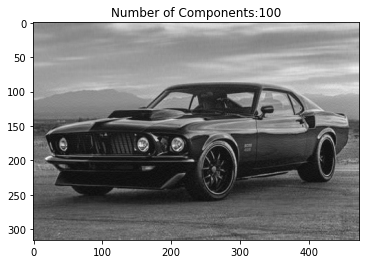

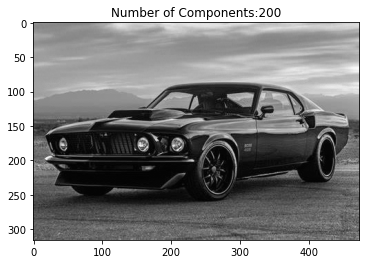

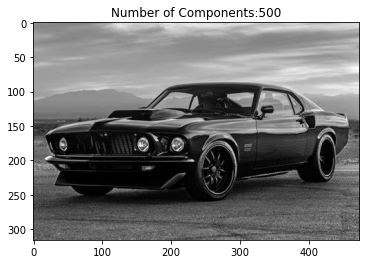

In [61]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()

We see we only need 100 to 200 Components to represent the image.